<a href="https://colab.research.google.com/github/sh0w0911/SJSU_CMPE_181/blob/main/CMPE181_MLIntro1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#define a deterministic nonlinear function underlying our generative model:
def f(x):
    return np.exp(3 * x)

In [3]:
#generate the values along the curve on [0,2].
x_tr = np.linspace(0., 2, 200)
y_tr = f(x_tr)

In [4]:
# let's generate data points within [0,1]. We use the function f and we add some Gaussian noise.
x = np.array([0, .1, .2, .5, .8, .9, 1])
y = f(x) + 3 * np.random.randn(len(x))

Text(0.5, 1.0, 'Generative model')

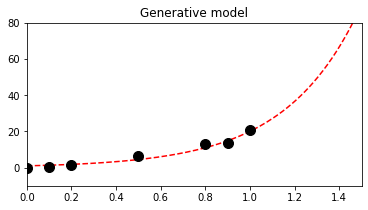

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--r')
ax.plot(x, y, 'ok', ms=10)
ax.set_xlim(0, 1.5)
ax.set_ylim(-10, 80)
ax.set_title('Generative model')

In [6]:
y.shape

(7,)

In [7]:
newx=x[:, np.newaxis]#add one dimention
newx.shape

(7, 1)

In [8]:
# We create the model.
lr = lm.LinearRegression()
# We train the model on our training dataset.
lr.fit(newx, y)
# Now, we predict points with our trained model.
newxr=x_tr[:, np.newaxis]
y_lr = lr.predict(newxr)
#We need to convert x and x_tr to column vectors, as it is a general convention in scikit-learn that observations are rows, while features are columns. Here, we have seven observations with one feature.

In [9]:
print(lr.coef_) 

[19.44155698]


In [10]:
y_lr.shape

(200,)

In [11]:
r2 = round(lr.score(newx, y),2)
print(r2)

0.95


Text(0.5, 1.0, 'Linear regression')

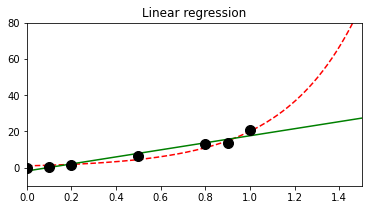

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--r')
ax.plot(x_tr, y_lr, 'g')
ax.plot(x, y, 'ok', ms=10)
ax.set_xlim(0, 1.5)
ax.set_ylim(-10, 80)
ax.set_title("Linear regression")

In [13]:
y_pred = lr.predict(x[:, np.newaxis])
y_pred.shape

(7,)

In [14]:
np.mean((y_pred - y)**2)# mean square error

2.9917302508105825

In [15]:
fig.savefig("linearregression1.pdf")

In [16]:
from sklearn.metrics import mean_squared_error

mse = (mean_squared_error(y, y_pred))
r2 = round(lr.score(newx, y),2)

print("The model performance for training set:")
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for training set:
MSE is 2.9917302508105825
R2 score is 0.95


Diabetes Dataset


In [17]:
import numpy as np
from sklearn import datasets

In [18]:
diabetes_dataset=datasets.load_diabetes()

In [19]:
diabetes_dataset

{'DESCR': '.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/

In [20]:
print(diabetes_dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [21]:
diabetes_X=diabetes_dataset.data
print(diabetes_X.shape)

(442, 10)


In [22]:
diabetes_y=diabetes_dataset.target
print(diabetes_y.shape)

(442,)


In [23]:
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test  = diabetes_X[-20:]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test  = diabetes_y[-20:]

In [24]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)
print(regr.coef_)

[ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]


In [25]:
np.mean((regr.predict(diabetes_X_test) - diabetes_y_test)**2)#mean square error

2004.5676026898211

In [26]:
regr.score(diabetes_X_test, diabetes_y_test) ## Explained variance score: 1 is perfect prediction and 0 means that there is no linear relationship between X and y.

0.5850753022690574